Projet Machine learning


Vous devez créer un système de recommandation de base en utilisant un ensemble de données provenant d'un service comme MovieLens:


https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset/data
1. La première tâche est le système qui recommanderait des films aux utilisateurs en fonction de leurs notes précédentes. 
Cela permettrait de tester les techniques de factorisation matricielle, le traitement des données éparses et l'évaluation des systèmes de recommandation.


2. La seconde tâche est de faire un modèle permettant de prédire la note d'un film






Etape 1: Importation des dependances 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Chargement et reduction du nombre d'observation de notre jeu de donnees

In [33]:


# Charger les données
ratingsINIT = pd.read_csv('rating.csv')



In [35]:


# Compter le nombre d'évaluations par utilisateur
user_counts = ratingsINIT['userId'].value_counts()

# Sélectionner les utilisateurs avec au moins 100 évaluations
selected_users = user_counts[user_counts >= 400].index

# Filtrer les données pour ne conserver que les utilisateurs sélectionnés
filtered_ratings = ratingsINIT[ratingsINIT['userId'].isin(selected_users)]

# Compter le nombre d'évaluations par film
movie_counts = filtered_ratings['movieId'].value_counts()

# Sélectionner les films avec au moins 100 évaluations
selected_movies = movie_counts[movie_counts >= 400].index



Exportation du jeu de données reduit

In [36]:
# Filtrer les données pour ne conserver que les films sélectionnés
filtered_ratings = filtered_ratings[filtered_ratings['movieId'].isin(selected_movies)]

# Exporter le dataset réduit en CSV localement
filtered_ratings.to_csv('filtered_ratings.csv', index=False)



In [37]:
# Comparer les tailles avant et après la réduction
total_records_orig = len(ratingsINIT)
total_records_reduced = len(filtered_ratings)

print(f"Nombre d'enregistrements dans le fichier d'origine : {total_records_orig}")
print(f"Nombre d'enregistrements dans le fichier réduit : {total_records_reduced}")
print(f"Différence : {total_records_orig - total_records_reduced} enregistrements réduits")


Nombre d'enregistrements dans le fichier d'origine : 20000263
Nombre d'enregistrements dans le fichier réduit : 6929129
Différence : 13071134 enregistrements réduits


Etape 2: Chargement de nos données 

In [38]:
ratings = pd.read_csv('filtered_ratings.csv')

In [39]:
ratings.head()

,userId,movieId,rating,timestamp
0,11,1,4.5,2009-01-02 01:13:41
1,11,10,2.5,2009-01-02 01:15:59
2,11,19,3.5,2009-01-01 04:21:44
3,11,32,5.0,2009-01-01 04:11:35
4,11,39,4.5,2009-01-02 01:17:12


In [25]:
movies = pd.read_csv('movie.csv')

In [22]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Étape 3 : Analyse exploratoire des données



In [40]:
# Calcul du nombre total de notations
n_rating = len(ratings)

# Calcul du nombre total de movieId uniques
n_movies = ratings['movieId'].nunique()

# Calcul du nombre total d'utilisateurs uniques
n_users = ratings['userId'].nunique()

# Affichage des résultats
print(f"Nombre total de notations : {n_rating}")
print(f"Nombre de movieId uniques : {n_movies}")
print(f"Nombre d'utilisateurs uniques : {n_users}")
print(f"Moyenne du nombre de notations par utilisateur : {round(n_rating/n_users, 2)}")
print(f"Moyenne du nombre de notations par film : {round(n_rating/n_movies, 2)}")


Nombre total de notations : 6929129
Nombre de movieId uniques : 3912
Nombre d'utilisateurs uniques : 10702
Moyenne du nombre de notations par utilisateur : 647.46
Moyenne du nombre de notations par film : 1771.25


Quelle est la distribution des évaluations des films ?
Cette question va explorer la répartition des évaluations données aux films dans l'ensemble de données.



/var/folders/10/s2c8f9_x4196t4gfqb0s2dgm0000gn/T/ipykernel_3169/2038653828.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="rating", data=ratings, palette="viridis")


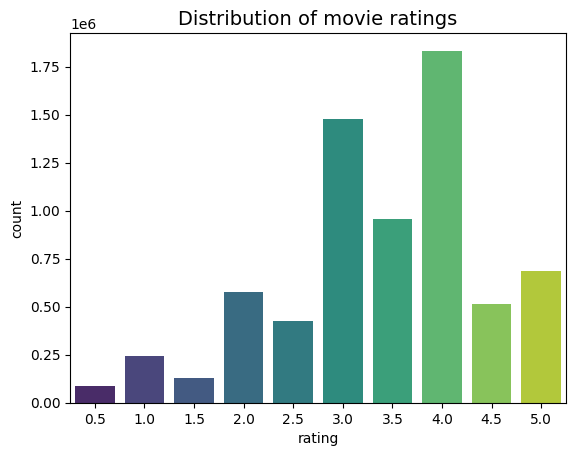

In [41]:
sns.countplot(x="rating", data=ratings, palette="viridis")
plt.title("Distribution of movie ratings", fontsize=14)
plt.show()

In [42]:
print(f"Moyenne globale des évaluations : {round(ratings['rating'].mean(), 2)}.")

moyenne_par_utilisateur = ratings.groupby('userId')['rating'].mean()
print(f"Moyenne des évaluations par utilisateur : {round(moyenne_par_utilisateur.mean(), 2)}.")


Moyenne globale des évaluations : 3.4.
Moyenne des évaluations par utilisateur : 3.43.


Quels sont les films les plus fréquemment évalués ?
cherche à identifier les films qui ont reçu le plus grand nombre d'évaluations dans l'ensemble de données.

In [43]:
# Fusionner les données de notations avec les données de films sur 'movieId'
movie_ratings = ratings.merge(movies, on='movieId')

# Compter le nombre d'occurrences de chaque titre de film
top_10_most_rated = movie_ratings['title'].value_counts().head(10)

# Afficher les 10 films les plus fréquemment évalués
print(top_10_most_rated)


title
Matrix, The (1999)                                                                9709
Forrest Gump (1994)                                                               9659
Jurassic Park (1993)                                                              9541
Back to the Future (1985)                                                         9521
Pulp Fiction (1994)                                                               9497
Silence of the Lambs, The (1991)                                                  9415
Star Wars: Episode IV - A New Hope (1977)                                         9357
Men in Black (a.k.a. MIB) (1997)                                                  9353
Star Wars: Episode V - The Empire Strikes Back (1980)                             9284
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)    9254
Name: count, dtype: int64


In [44]:
# Calculer les moyennes des évaluations par 'movieId'
mean_ratings = ratings.groupby('movieId')[['rating']].mean()

# Trouver l'indice du film avec la note moyenne la plus basse
lowest_rated_idx = mean_ratings['rating'].idxmin()

# Afficher les informations sur le film avec la note moyenne la plus basse
movies[movies['movieId'] == lowest_rated_idx]


,movieId,title,genres
6477,6587,Gigli (2003),Comedy|Crime|Romance


`Gigli`  a la note moyenne la plus basse

In [45]:
# Calculer les moyennes des évaluations par 'movieId'
mean_ratings = ratings.groupby('movieId')[['rating']].mean()

# Trouver l'indice du film avec la note moyenne la plus élevée
highest_rated = mean_ratings['rating'].idxmax()

# Afficher les informations sur le film avec la note moyenne la plus élevée
highest_rated_movie = movies[movies['movieId'] == highest_rated]
print(highest_rated_movie)


     movieId                  title       genres
843      858  Godfather, The (1972)  Crime|Drama


Combien d'évaluations a Godfather

In [46]:
ratings[ratings['movieId']==highest_rated]

,userId,movieId,rating,timestamp
65,11,858,2.5,2009-01-02 01:15:24
1038,54,858,5.0,2000-11-28 19:40:48
1722,58,858,5.0,2000-11-20 10:05:38
2367,91,858,5.0,2005-03-23 03:41:29
2890,96,858,3.0,2014-01-01 18:27:46
...,...,...,...,...
6924558,138382,858,5.0,2000-04-01 00:33:01
6926038,138404,858,3.5,2006-01-23 09:03:13
6926465,138406,858,4.0,2005-12-12 20:36:43
6927039,138411,858,5.0,2005-04-01 16:50:50


Utilisation de la moyenne de Bayes
#### Moyenne Bayésienne

La [moyenne bayésienne](https://en.wikipedia.org/wiki/Bayesian_average) est une méthode utilisée pour calculer une note moyenne pondérée qui prend en compte non seulement la moyenne des évaluations, mais aussi le nombre de ces évaluations. Cette méthode est particulièrement utile pour éviter que des films avec très peu d'évaluations, mais des notes extrêmes, ne dominent les classements.

La formule de la moyenne bayésienne est :

\[ r_{i} = \frac{C \times m + \Sigma{\text{reviews}}}{C + N} \]

où :
- \( C \) représente notre confiance et est défini comme le nombre moyen de notations par film.
- \( m \) représente notre prior et est défini comme la moyenne globale des évaluations de tous les films.
- \( N \) est le nombre total de notations pour le film \( i \).

En utilisant cette formule, nous pouvons obtenir une évaluation plus équilibrée de la popularité d'un film, en tenant compte à la fois de la qualité des évaluations et de leur quantité.


In [47]:
# Grouper les notations par 'movieId' et calculer le nombre de votes et la moyenne des notes
movie_stats = ratings.groupby('movieId')['rating'].agg(['count', 'mean'])

# Afficher les premières lignes des statistiques des films
movie_stats.head()


,count,mean
movieId,,
1,8771,3.851841
2,6139,2.957566
3,2737,2.886189
4,782,2.581841
5,2419,2.708557


In [48]:
# Calculer C et m
C = movie_stats['count'].mean()
m = movie_stats['mean'].mean()

# Afficher les moyennes calculées
print(f"Nombre moyen de notations pour un film donné : {C:.2f}")
print(f"Note moyenne pour un film donné : {m:.2f}")

# Définition de la fonction pour calculer la moyenne bayésienne
def bayesian_avg(ratings):
    bayesian_avg = (C * m + ratings.sum()) / (C + ratings.count())
    return round(bayesian_avg, 3)

# Exemple d'utilisation de la fonction bayesian_avg
example_ratings = pd.Series([4, 5, 3, 4, 5])  # Exemple de série de notations
print(f"Moyenne bayésienne : {bayesian_avg(example_ratings)}")


Nombre moyen de notations pour un film donné : 1771.25
Note moyenne pour un film donné : 3.28
Moyenne bayésienne : 3.282


#### Test de la Fonction `bayesian_avg`

Nous allons tester la fonction `bayesian_avg` sur le film "The Godfather" avec les notations `[5, 5]`.

La fonction `bayesian_avg` calcule une moyenne bayésienne pondérée qui prend en compte à la fois la moyenne des évaluations existantes et le nombre de ces évaluations. Cela permet d'obtenir une estimation plus équilibrée de la note moyenne du film, en accordant plus de poids aux films avec plus de notations.

En exécutant cette fonction sur "The Godfather" avec les notations `[5, 5]`, nous obtenons une estimation de la note moyenne pondérée pour ce film.


In [49]:
# Définir la série de notations pour The Godfather
godfather_ratings = pd.Series([5, 5])

# Calculer la moyenne bayésienne pour The Godfather en utilisant la fonction bayesian_avg
result = bayesian_avg(godfather_ratings)

# Afficher le résultat
print(f"Moyenne bayésienne pour The Godfather : {result}")


Moyenne bayésienne pour The Godfather : 3.282


Application de la moyenne de bayes sur tous les films
Moyenne bayésienne pour The Godfather : 3.282


But de la Moyenne Bayésienne pour les Films
Le but principal de la moyenne bayésienne appliquée aux films est de fournir une estimation plus fiable de la note moyenne d'un film en prenant en considération :

La Moyenne des Notes : C'est la moyenne arithmétique des notes attribuées au film.
Le Nombre de Notations : C'est le nombre total de notations ou de critiques reçues par le film.


Pour appliquer la moyenne bayésienne à l'ensemble des films dans un ensemble de données, on calcule d'abord les paramètres nécessaires comme la moyenne des notes et le nombre moyen de notations par film. Ensuite, pour chaque film, on utilise ces paramètres pour calculer sa moyenne bayésienne en fonction de ses notations disponibles.

In [50]:
# Calcul de la moyenne bayésienne pour chaque film
bayesian_avg_ratings = ratings.groupby('movieId')['rating'].agg(bayesian_avg).reset_index()

# Renommage des colonnes pour une meilleure lisibilité
bayesian_avg_ratings.columns = ['movieId', 'bayesian_avg']

# Fusion des moyennes bayésiennes avec les statistiques de base par film
movie_stats = movie_stats.merge(bayesian_avg_ratings, on='movieId')


ce code réalise le calcul des moyennes bayésiennes pour chaque film et les intègre dans votre ensemble de données movie_stats, enrichissant ainsi l'analyse avec une mesure plus sophistiquée de la qualité perçue des films, prenant en compte à la fois le nombre et la valeur des évaluations reçues.

In [51]:
# Fusion des données de movie_stats avec les titres des films à partir du DataFrame movies
movie_stats = movie_stats.merge(movies[['movieId', 'title']])

# Tri des films par moyenne bayésienne décroissante et affichage des cinq premiers
top_movies = movie_stats.sort_values('bayesian_avg', ascending=False).head()

# Affichage des cinq premiers films les mieux notés par moyenne bayésienne
print(top_movies[['title', 'bayesian_avg']])


                                                 title  bayesian_avg
202                   Shawshank Redemption, The (1994)         4.191
478                              Godfather, The (1972)         4.190
43                          Usual Suspects, The (1995)         4.109
188                                Pulp Fiction (1994)         4.100
663  Raiders of the Lost Ark (Indiana Jones and the...         4.083



En utilisant la moyenne bayésienne, il est évident que des films comme "Shawshank Redemption", "The Godfather" et "The Usual Suspects" se distinguent comme les mieux notés. Cela correspond bien à leur reconnaissance critique et à leur réputation de qualité. La moyenne bayésienne permet de pondérer les évaluations en tenant compte à la fois de la note moyenne et du nombre de notations reçues, offrant ainsi une mesure plus robuste de la qualité perçue d'un film.

In [52]:
# Tri des films par moyenne bayésienne croissante pour trouver les moins bien notés
bottom_movies = movie_stats.sort_values('bayesian_avg', ascending=True).head()

# Affichage des cinq premiers films les moins bien notés par moyenne bayésienne
print(bottom_movies[['title', 'bayesian_avg']])


                               title  bayesian_avg
879   Speed 2: Cruise Control (1997)         2.360
1978        Battlefield Earth (2000)         2.380
880            Batman & Robin (1997)         2.401
864                  Anaconda (1997)         2.469
1528           Wild Wild West (1999)         2.481


Ce code triera le DataFrame movie_stats par la colonne bayesian_avg en ordre croissant (ascending=True), ce qui permettra d'identifier les cinq films ayant les moyennes bayésiennes les plus basses. Ensuite, il affichera les titres et les moyennes bayésiennes de ces films. Assurez-vous que movie_stats contienne les colonnes nécessaires telles que title et bayesian_avg pour que cela fonctionne correctement

Avec la moyenne bayésienne, il semble que les films comme Speed 2: Cruise Control, Battlefield Earth et Godzilla sont parmi les moins bien notés. 

Aperçu des Genres de Films
Nettoyage des Genres :

Les genres sont actuellement exprimés sous forme de chaîne de caractères avec un séparateur pipe | entre chaque genre. Nous allons manipuler cette chaîne pour la convertir en une liste, ce qui facilitera notre analyse.
Extraction de l'Année depuis le Titre :

Actuellement, le titre de chaque film est suivi de l'année entre parenthèses. Nous allons extraire cette année et la stocker dans une nouvelle colonne.
En suivant ces étapes, nous rendrons nos données plus structurées et plus faciles à analyser.







In [53]:
# Application de la transformation pour convertir les genres en listes
movies['genres'] = movies['genres'].apply(lambda x: x.split("|"))

# Affichage des premières lignes pour vérification
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]


Combien y a-t-il de genres de films différents ?




In [54]:
from collections import Counter

# Compter la fréquence des genres
genre_frequency = Counter(g for genres in movies['genres'] for g in genres)

# Afficher le nombre de genres uniques
print(f"Il y a {len(genre_frequency)} genres différents.")

# Afficher la fréquence des genres
genre_frequency


Il y a 20 genres différents.


Counter({'Drama': 13344,
         'Comedy': 8374,
         'Thriller': 4178,
         'Romance': 4127,
         'Action': 3520,
         'Crime': 2939,
         'Horror': 2611,
         'Documentary': 2471,
         'Adventure': 2329,
         'Sci-Fi': 1743,
         'Mystery': 1514,
         'Fantasy': 1412,
         'War': 1194,
         'Children': 1139,
         'Musical': 1036,
         'Animation': 1027,
         'Western': 676,
         'Film-Noir': 330,
         '(no genres listed)': 246,
         'IMAX': 196})

In [55]:
print("Les 5 genres les plus courants : \n", genre_frequency.most_common(5))


Les 5 genres les plus courants : 
 [('Drama', 13344), ('Comedy', 8374), ('Thriller', 4178), ('Romance', 4127), ('Action', 3520)]


Les cinq genres les plus populaires sont : Drame, Comédie, Thriller, Action et Romance.

Nous allons également visualiser la popularité des genres avec un graphique à barres.

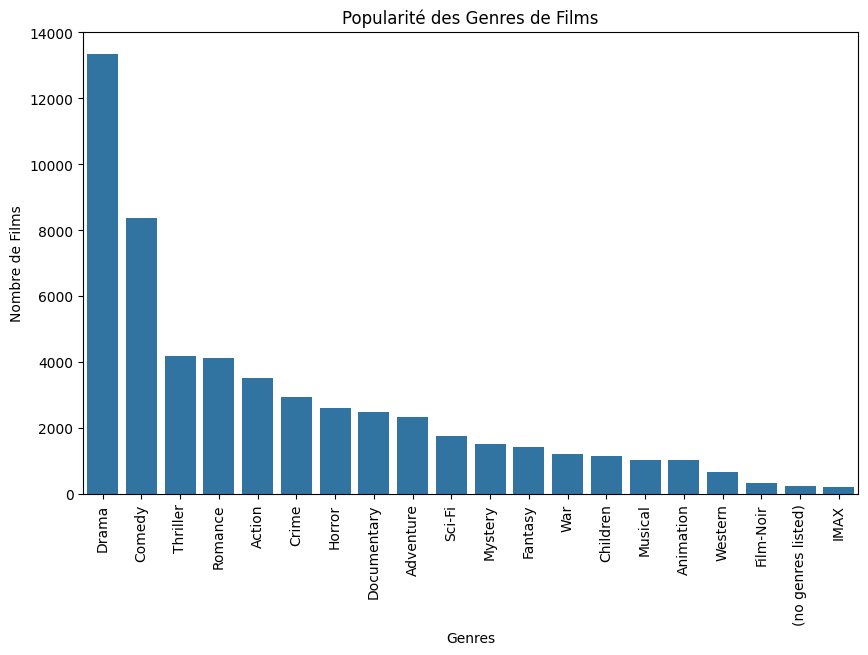

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Création du DataFrame à partir du dictionnaire genre_frequency
genre_frequency_df = pd.DataFrame(list(genre_frequency.items()), columns=['genre', 'count'])

# Création du graphique à barres avec seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.xlabel('Genres')
plt.ylabel('Nombre de Films')
plt.title('Popularité des Genres de Films')
plt.show()


Étape 4 : Prétraitement des Données
Nous allons utiliser une technique appelée filtrage collaboratif pour générer des recommandations pour les utilisateurs. Cette technique repose sur l'idée que des personnes similaires aiment des choses similaires.

La première étape consiste à transformer nos données en une matrice utilisateur-article, également appelée matrice "utilité". Dans cette matrice, les lignes représentent les utilisateurs et les colonnes représentent les films. L'avantage du filtrage collaboratif est qu'il ne nécessite aucune information spécifique sur les utilisateurs ou les films pour générer des recommandations.







La fonction create_X() produit une matrice creuse X
accompagnée de quatre dictionnaires de mappage :

user_mapper : associe l'identifiant d'utilisateur à l'indice correspondant dans la matrice X

movie_mapper : associe l'identifiant de film à l'indice correspondant dans la matrice X

user_inv_mapper : associe l'indice dans la matrice X
à l'identifiant d'utilisateur correspondant.
movie_inv_mapper : associe l'indice dans la matrice 
X à l'identifiant de film correspondant.

La matrice X est de type sparse CSR (scipy.sparse.csr_matrix), ce qui  signifie qu'elle est optimisée pour le stockage de données où la majorité des valeurs sont nulles. C'est particulièrement efficace pour les systèmes de recommandation où chaque utilisateur n'interagit qu'avec un petit nombre d'articles parmi une grande sélection disponible.

In [62]:
from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd

def create_X(df):
    """
    Génère une matrice creuse à partir d'un dataframe de notations.
    
    Args:
        df: dataframe pandas contenant 3 colonnes (userId, movieId, rating)
    
    Returns:
        X: matrice creuse représentant les notations
        user_mapper: dictionnaire qui mappe les ID utilisateur aux indices d'utilisateur
        user_inv_mapper: dictionnaire qui mappe les indices d'utilisateur aux ID utilisateur
        movie_mapper: dictionnaire qui mappe les ID film aux indices de film
        movie_inv_mapper: dictionnaire qui mappe les indices de film aux ID film
    """
    M = df['userId'].nunique()  # Nombre d'utilisateurs uniques
    N = df['movieId'].nunique()  # Nombre de films uniques

    # Création des mappages pour les utilisateurs et les films
    user_mapper = dict(zip(np.unique(df["userId"]), list(range(M))))
    movie_mapper = dict(zip(np.unique(df["movieId"]), list(range(N))))
    
    # Mappage inverse pour les utilisateurs et les films
    user_inv_mapper = dict(zip(list(range(M)), np.unique(df["userId"])))
    movie_inv_mapper = dict(zip(list(range(N)), np.unique(df["movieId"])))
    
    # Indexation des utilisateurs et des films dans la matrice X
    user_index = [user_mapper[i] for i in df['userId']]
    item_index = [movie_mapper[i] for i in df['movieId']]

    # Création de la matrice creuse X
    X = csr_matrix((df["rating"], (user_index, item_index)), shape=(M, N))
    
    return X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper

# Exemple d'utilisation avec le dataframe 'ratings'
X, user_mapper, movie_mapper, user_inv_mapper, movie_inv_mapper = create_X(ratings)


Cette fonction prend en entrée un dataframe contenant les colonnes userId, movieId, et rating, et génère une matrice creuse X où les lignes représentent les utilisateurs, les colonnes représentent les films, et les valeurs représentent les notations données par les utilisateurs aux films. Les dictionnaires user_mapper, user_inv_mapper, movie_mapper, et movie_inv_mapper sont créés pour mapper respectivement les ID utilisateur aux indices d'utilisateur, les indices d'utilisateur aux ID utilisateur, les ID film aux indices de film, et les indices de film aux ID film.

In [63]:
X.shape

(10702, 3912)

Notre matrice X contient 10702 utilisateurs et 3912 films.


Ici, nous évaluons la sparsité en calculant le rapport entre le nombre d'éléments stockés (non vides) dans notre matrice et le nombre total d'éléments possibles. Le nombre d'éléments stockés dans notre matrice, également appelé nnz (pour "number of non-zero elements"), correspond au nombre de notations présentes dans notre jeu de données.

c'est une mesure qui indique à quel point une matrice est creuse, c'est-à-dire combien de ses entrées sont non nulles par rapport à toutes les entrées possibles.


In [64]:
n_total = X.shape[0] * X.shape[1]  # Nombre total d'éléments dans la matrice X
n_ratings = X.nnz  # Nombre d'éléments non nuls (notations) dans X
sparsity = n_ratings / n_total  # Calcul de la sparsité

print(f"Sparsité de la matrice : {round(sparsity * 100, 2)}%")


Sparsité de la matrice : 16.55%


Cela signifie que environ 16,55 % des entrées de la matrice sont des notations effectivement données par les utilisateurs, tandis que le reste (environ 83,45 %) est constitué de valeurs manquantes, ce qui reflète le fait que chaque utilisateur n'a noté qu'un petit sous-ensemble des films disponibles.

In [65]:
n_ratings_per_user = X.getnnz(axis=1)
len(n_ratings_per_user)


10702

In [66]:
print(f"L'utilisateur le plus actif a noté {n_ratings_per_user.max()} films.")
print(f"L'utilisateur le moins actif a noté {n_ratings_per_user.min()} films.")


L'utilisateur le plus actif a noté 3528 films.
L'utilisateur le moins actif a noté 107 films.


In [68]:
# Calcul du nombre de notations par film dans la matrice X
n_ratings_per_movie = X.getnnz(axis=0)

# Nombre total de films pour lesquels des notations sont présentes dans la matrice X
len(n_ratings_per_movie)


3912

In [69]:
print(f"Le film le plus noté a {n_ratings_per_movie.max()} évaluations.")
print(f"Le film le moins noté a {n_ratings_per_movie.min()} évaluation.")


Le film le plus noté a 9709 évaluations.
Le film le moins noté a 400 évaluation.


Étape 5 : Recommandations entre articles avec les k plus proches voisins




Cela signifie que nous allons rechercher les $k$ films dont les patterns d'engagement des utilisateurs sont les plus similaires à celui du film $i$. En d'autres termes, nous cherchons les films qui ont été notés de manière similaire par les mêmes utilisateurs que ceux qui ont noté le film $i$. C'est une approche basée sur la similarité des utilisateurs pour recommander des films similaires à ceux que les utilisateurs ont déjà aimés ou notés.

In [70]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, k, metric='cosine'):
    """
    Trouve les k plus proches voisins pour un film donné.
    
    Args:
        movie_id: ID du film d'intérêt
        X: matrice utilitaire utilisateur-article
        k: nombre de films similaires à récupérer
        metric: métrique de distance pour les calculs kNN
    
    Renvoie: une liste des ID de k films similaires
    """
    X = X.T
    neighbour_ids = []
    
    movie_ind = movie_mapper[movie_id]
    movie_vec = X[movie_ind]
    if isinstance(movie_vec, (np.ndarray)):
        movie_vec = movie_vec.reshape(1,-1)
    
    # utiliser k+1 car la sortie kNN inclut l'ID du film d'intérêt
    kNN = NearestNeighbors(n_neighbors=k+1, algorithm="brute", metric=metric)
    kNN.fit(X)
    neighbour = kNN.kneighbors(movie_vec, return_distance=False)
    
    for i in range(0, k):
        n = neighbour.item(i)
        neighbour_ids.append(movie_inv_mapper[n])
    
    neighbour_ids.pop(0)  # supprimer l'ID du film d'intérêt de la liste des voisins
    return neighbour_ids


find_similar_movies() prend en entrée un movieId et la matrice X, et retourne une liste de $k$ films similaires au movieId d'intérêt.

Voyons comment cela fonctionne en pratique. Nous allons d'abord créer un autre mapper qui associe l'ID du film à son titre pour que nos résultats soient interprétables.

In [72]:
similar_movies = find_similar_movies(1, X, movie_mapper, movie_inv_mapper, k=10)
similar_movies

[1270, 480, 356, 2571, 1580, 260, 1196, 1198, 3114]

find_similar_movies() renvoie une liste d'identifiants movieId qui sont les plus similaires au film qui vous intéresse. Convertissons ces identifiants en titres pour pouvoir interpréter nos résultats. Pour simplifier les choses, nous allons créer un dictionnaire qui associe chaque movieId à son title.

In [77]:
# Création d'un dictionnaire qui mappe les IDs de films aux titres correspondants
movie_titles = dict(zip(movies['movieId'], movies['title']))

# ID du film pour lequel on cherche des films similaires
movie_id = 1

# Appel de la fonction find_similar_movies avec la mesure de similarité 'cosine' et k=10
similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='cosine', k=10)

# Récupération du titre du film initial
movie_title = movie_titles[movie_id]

# Affichage du message d'introduction
print(f"Parce que vous avez regardé {movie_title} :")

# Affichage des titres des films similaires trouvés
for movie_id in similar_movies:
    print(movie_titles[movie_id])


Parce que vous avez regardé Toy Story (1995) :
Back to the Future (1985)
Jurassic Park (1993)
Forrest Gump (1994)
Matrix, The (1999)
Men in Black (a.k.a. MIB) (1997)
Star Wars: Episode IV - A New Hope (1977)
Star Wars: Episode V - The Empire Strikes Back (1980)
Raiders of the Lost Ark (Indiana Jones and the Raiders of the Lost Ark) (1981)
Toy Story 2 (1999)


Les résultats ci-dessus montrent les 10 films les plus similaires à Toy Story. La plupart des films de cette liste sont des films familiaux des années 1990, ce qui semble raisonnable. Notez que ces recommandations sont basées uniquement sur les évaluations utilisateur-film. Les caractéristiques des films telles que les genres ne sont pas prises en compte dans cette approche.

Ainsi, après avoir obtenu les IDs des films similaires à un film donné à l'aide de find_similar_movies(), nous pouvons utiliser ce mapping pour afficher les titres des films recommandés plutôt que leurs IDs. Cela rend l'expérience utilisateur plus conviviale et facilite la prise de décision concernant les recommandations de films similaires.


  On peut essayer différentes mesures de distance dans l'algorithme des plus proches voisins (kNN) pour voir comment elles affectent les résultats des recommandations de films similaires. Par exemple, la distance "manhattan" et la distance "euclidienne" sont d'autres options que vous pouvez choisir pour calculer la similarité entre les films basée sur les évaluations des utilisateurs.







In [78]:
movie_id = 1

similar_movies = find_similar_movies(movie_id, X, movie_mapper, movie_inv_mapper, metric='euclidean', k=10)
movie_title = movie_titles[movie_id]

print(f"Parce que vous avez regardé {movie_title} :")
for movie_id in similar_movies:
    print(movie_titles[movie_id])


Parce que vous avez regardé Toy Story (1995) :
Jurassic Park (1993)
Men in Black (a.k.a. MIB) (1997)
Back to the Future (1985)
Toy Story 2 (1999)
Forrest Gump (1994)
E.T. the Extra-Terrestrial (1982)
Lion King, The (1994)
Ghostbusters (a.k.a. Ghost Busters) (1984)
Star Wars: Episode VI - Return of the Jedi (1983)


Étape 6 : Gestion du problème de démarrage à froid
Le filtrage collaboratif repose uniquement sur les interactions utilisateur-élément au sein de la matrice d'utilité. Le problème avec cette approche est que les nouveaux utilisateurs ou les éléments sans interaction sont exclus du système de recommandation. C'est ce qu'on appelle le problème de démarrage à froid. Le filtrage basé sur le contenu est une façon de résoudre ce problème en générant des recommandations basées sur les caractéristiques des utilisateurs et des éléments.

Tout d'abord, nous devons convertir la colonne genres en caractéristiques binaires. Chaque genre aura sa propre colonne dans le dataframe, remplie de 0 ou de 1.







In [79]:
n_movies = movies['movieId'].nunique()
print(f"Il y a {n_movies} films uniques dans notre jeu de données de films.")


Il y a 27278 films uniques dans notre jeu de données de films.


In [80]:
# Crée un ensemble de tous les genres uniques à partir de la colonne 'genres'
genres = set(g for G in movies['genres'] for g in G)

# Pour chaque genre, crée une nouvelle colonne dans le dataframe movies
for g in genres:
    # Transforme la colonne 'genres' en une colonne binaire indiquant la présence du genre
    movies[g] = movies.genres.transform(lambda x: int(g in x))
    
# Crée un nouveau dataframe 'movie_genres' sans les colonnes 'movieId', 'title', et 'genres'
movie_genres = movies.drop(columns=['movieId', 'title','genres'])


In [81]:
movie_genres.head()

,Romance,Mystery,Crime,Musical,Adventure,Animation,Horror,Thriller,Children,Comedy,Documentary,IMAX,Sci-Fi,Action,Film-Noir,Western,War,Fantasy,(no genres listed),Drama
0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [83]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(movie_genres, movie_genres)
print(f"La dimension de la matrice de similarité cosinus entre les genres des films : {cosine_sim.shape}")

La dimension de la matrice de similarité cosinus entre les genres des films : (27278, 27278)


Cela signifie que notre matrice de similarité cosinus basée sur les genres des films a une dimension de 27278 par 27278. Chaque entrée de cette matrice représente la similarité cosinus entre deux films en fonction de leurs genres. Ainsi, chaque film est comparé à tous les autres films dans le dataset pour évaluer leur similitude basée sur les genres.

La dimension de la matrice de similarité cosinus entre les genres des films est de 27278× 27278
parce qu'elle compare chaque film dans le dataset avec tous les autres films. Chaque film est représenté comme un vecteur binaire où chaque élément correspond à la présence ou non d'un genre spécifique. Ainsi, pour chaque paire de films, la matrice calcule la similarité cosinus entre leurs vecteurs de genres, produisant ainsi une matrice carrée  

### Création d'une fonction de recherche de film

Disons que nous voulons obtenir des recommandations pour des films similaires à Jumanji. Pour obtenir des résultats de notre système de recommandation, nous devons connaître le titre exact d'un film dans notre ensemble de données.

Dans notre ensemble de données, Jumanji est en fait répertorié sous le titre 'Jumanji (1995)'. Si nous faisons une faute d'orthographe pour Jumanji ou oublions d'inclure son année de sortie, notre système de recommandation ne pourra pas identifier le film qui nous intéresse.

Pour rendre notre système de recommandation plus convivial, nous pouvons utiliser un package Python appelé [fuzzywuzzy](https://pypi.org/project/fuzzywuzzy/) qui trouvera le titre le plus similaire à une chaîne que vous lui passez. Créons une fonction appelée `movie_finder()` qui tire parti de l'algorithme de correspondance de chaînes de fuzzywuzzy pour obtenir le titre le plus similaire à une chaîne entrée par l'utilisateur.


In [85]:
from fuzzywuzzy import process

def movie_finder(title):
    all_titles = movies['title'].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

/Users/mouhamedtoure/anaconda3/envs/Flask_machinee_learning/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Testons cela avec notre exemple de Lion King.

In [86]:
title = movie_finder('Lion King')
title

'Lion King, The (1994)'

Pour obtenir des recommandations pertinentes pour Lion King, nous devons trouver son index dans la matrice de similarité cosinus.

 Pour identifier quelle ligne nous devons regarder, nous pouvons créer un dictionnaire d'index de films qui mappe un titre de film à l'indice qu'il représente dans notre matrice.

Créons un dictionnaire d'index de films appelé movie_idx où les clés sont les titres des films et les valeurs sont les indices des films :

In [87]:
movie_idx = dict(zip(movies['title'], list(movies.index)))
idx = movie_idx[title]
print(f"Movie index for Lion King: {idx}")

Movie index for Lion King: 360


En utilisant ce dictionnaire pratique movie_idx, nous savons que Lion King est représenté par l'indice 360 dans notre matrice. Obtenez maintenant les 10 films les plus similaires à Lion King.




In [88]:
n_recommendations=10
sim_scores = list(enumerate(cosine_sim[idx]))
sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
sim_scores = sim_scores[1:(n_recommendations+1)]
similar_movies = [i[0] for i in sim_scores]

similar_movies est un tableau d'indices qui représente les 10 meilleures recommandations pour Jumanji. Nous pouvons obtenir les titres de films correspondants en créant un inverse du mapper movie_idx ou en utilisant iloc sur la colonne des titres du dataframe des films.

In [89]:
print(f"Parce que vous avez regardez {title}:")
movies['title'].iloc[similar_movies]

Parce que vous avez regardez Lion King, The (1994):


1631                                      Anastasia (1997)
871      Land Before Time III: The Time of the Great Gi...
1010                                          Dumbo (1941)
1011                                  Pete's Dragon (1977)
2015                              Song of the South (1946)
2055                            Secret of NIMH, The (1982)
2601                                         Tarzan (1999)
3072                                  Fantasia 2000 (1999)
11349    Land Before Time II: The Great Valley Adventur...
12941                            Fly Me to the Moon (2008)
Name: title, dtype: object

Il est agréable de voir que les recommandations correspondent bien au genre et au thème de Jumanji. Les films familiaux des années 90 devraient certainement plaire aux fans de Lion King.

Nous pouvons tester notre système de recommandation avec d'autres titres de films. Pour votre commodité, regroupons les étapes dans une seule fonction qui prendra en entrée le titre du film d'intérêt et le nombre de recommandations souhaité.




In [90]:
def get_content_based_recommendations(title_string, n_recommendations=10):
    # Trouver le titre de film le plus proche correspondant
    title = movie_finder(title_string)
    
    # Obtenir l'indice du film dans notre matrice de similarité cosinus
    idx = movie_idx[title]
    
    # Calculer les scores de similarité cosinus entre le film et tous les autres films
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Trier les films en fonction des scores de similarité
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Exclure le film lui-même et sélectionner les top n_recommendations
    sim_scores = sim_scores[1:(n_recommendations+1)]
    
    # Extraire les indices des films recommandés
    similar_movies = [i[0] for i in sim_scores]
    
    # Afficher les résultats de recommandation
    print(f"Parce que vous avez regardé {title} :")
    print(movies['title'].iloc[similar_movies])


In [91]:
get_content_based_recommendations('toy story', 5)

Parce que vous avez regardé Toy Story (1995) :
2209                                       Antz (1998)
3027                                Toy Story 2 (1999)
3663    Adventures of Rocky and Bullwinkle, The (2000)
3922                  Emperor's New Groove, The (2000)
4790                             Monsters, Inc. (2001)
Name: title, dtype: object


Étape 7 : Réduction de la dimensionnalité avec la factorisation de matrices (avancée)
La factorisation de matrices (MF) est une technique d'algèbre linéaire qui nous permet de découvrir des caractéristiques latentes sous-jacentes aux interactions entre utilisateurs et films. Ces caractéristiques latentes offrent une représentation plus compacte des goûts des utilisateurs et des descriptions des éléments. La MF est particulièrement utile pour les données très dispersées et peut améliorer la qualité des recommandations. L'algorithme fonctionne en factorisant la matrice utilisateur-élément d'origine en deux matrices de facteurs :

Matrice de facteurs utilisateur (n_utilisateurs, k)
Matrice de facteurs d'éléments (k, n_éléments)
Nous réduisons les dimensions de notre matrice d'origine en dimensions "de goût". Nous ne pouvons pas interpréter ce que représente chaque caractéristique latente $k$. Cependant, nous pourrions imaginer qu'une caractéristique latente pourrait représenter des utilisateurs qui aiment les comédies romantiques des années 1990, tandis qu'une autre caractéristique latente pourrait représenter des films indépendants en langue étrangère.







In [92]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=20, n_iter=10)
Q = svd.fit_transform(X.T)
Q.shape


(3912, 20)

Ce code initialise TruncatedSVD avec 20 composants et 10 itérations. Ensuite, il ajuste et transforme la transposée de la matrice X
ce qui donne la matrice Q
qui capture la matrice de facteurs des items avec des dimensions réduites. La forme de Q
reflétera le nombre d'items (9724 dans votre cas) et le nombre de composants spécifiés (20 dans cet exemple).

In [93]:
movie_id = 1
similar_movies = find_similar_movies(movie_id, Q.T, movie_mapper, movie_inv_mapper, metric='cosine', k=10)
movie_title = movie_titles[movie_id]

print(f"Parce que vous avez regarde {movie_title}:")
for i in similar_movies:
    print(movie_titles[i])

Parce que vous avez regarde Toy Story (1995):
Back to the Future (1985)
Jurassic Park (1993)
Men in Black (a.k.a. MIB) (1997)
Aladdin (1992)
E.T. the Extra-Terrestrial (1982)
Bug's Life, A (1998)
Toy Story 2 (1999)
Lion King, The (1994)
Groundhog Day (1993)


Les résultats ci-dessus montrent les films les plus similaires à Toy Story en utilisant kNN sur notre matrice de facteurs de films "compressée". Nous avons réduit les dimensions à n_components=20. Chaque composant peut être considéré comme représentant une caractéristique latente, comme le genre du film ou d'autres caractéristiques sous-jacentes.

In [120]:
import pickle
import numpy as np



# Sauvegarde les fichiers pickle
with open('movies.pkl', 'wb') as f:
    pickle.dump(movies, f)

with open('similarity.pkl', 'wb') as f:
    pickle.dump({'X': X, 'movie_mapper': movie_mapper, 'movie_inv_mapper': movie_inv_mapper}, f)


In [121]:
movies.head()

,movieId,title,genres,Romance,Mystery,Crime,Musical,Adventure,Animation,Horror,...,Documentary,IMAX,Sci-Fi,Action,Film-Noir,Western,War,Fantasy,(no genres listed),Drama
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]",0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]",0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Grumpier Old Men (1995),"[Comedy, Romance]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,Father of the Bride Part II (1995),[Comedy],0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
